In [10]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
import pandas as pd
import numpy as np

In [18]:
my_dpi = 200
fpath = "./NotoSansKR-Regular.ttf"
fm.fontManager.addfont(fpath)
fprop = fm.FontProperties(fname=fpath)
fname = fprop.get_name()


plt.rcParams['font.family'] = fpath
plt.rcParams['font.size'] = 6
plt.rcParams['axes.unicode_minus'] = False


In [19]:
origin = load_data("icecream")
origin

[data] https://data.hossam.kr/data/lab06/icecream.xlsx
[desc] 기온과 아이스크림 판매량을 기록한 가상의 데이터 (메타데이터,인덱스 없음)
[!] Cannot read metadata


,기온,판매량
0,23,431
1,36,593
2,30,512
3,25,474
4,26,476
5,31,523
6,29,491
7,32,526
8,33,550
9,24,456


findfont: Font family './NotoSansKR-Regular.ttf' not found.
findfont: Font family './NotoSansKR-Regular.ttf' not found.
findfont: Font family './NotoSansKR-Regular.ttf' not found.
findfont: Font family './NotoSansKR-Regular.ttf' not found.
findfont: Font family './NotoSansKR-Regular.ttf' not found.
findfont: Font family './NotoSansKR-Regular.ttf' not found.
findfont: Font family './NotoSansKR-Regular.ttf' not found.
findfont: Font family './NotoSansKR-Regular.ttf' not found.
findfont: Font family './NotoSansKR-Regular.ttf' not found.
C:\Users\itwill\AppData\Local\Temp\ipykernel_30012\3249754266.py:14: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\itwill\AppData\Local\Temp\ipykernel_30012\3249754266.py:14: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
findfont: Font family './NotoSansKR-Regular.ttf' not found.
findfont: Font family './NotoSansKR-Regular.ttf' not

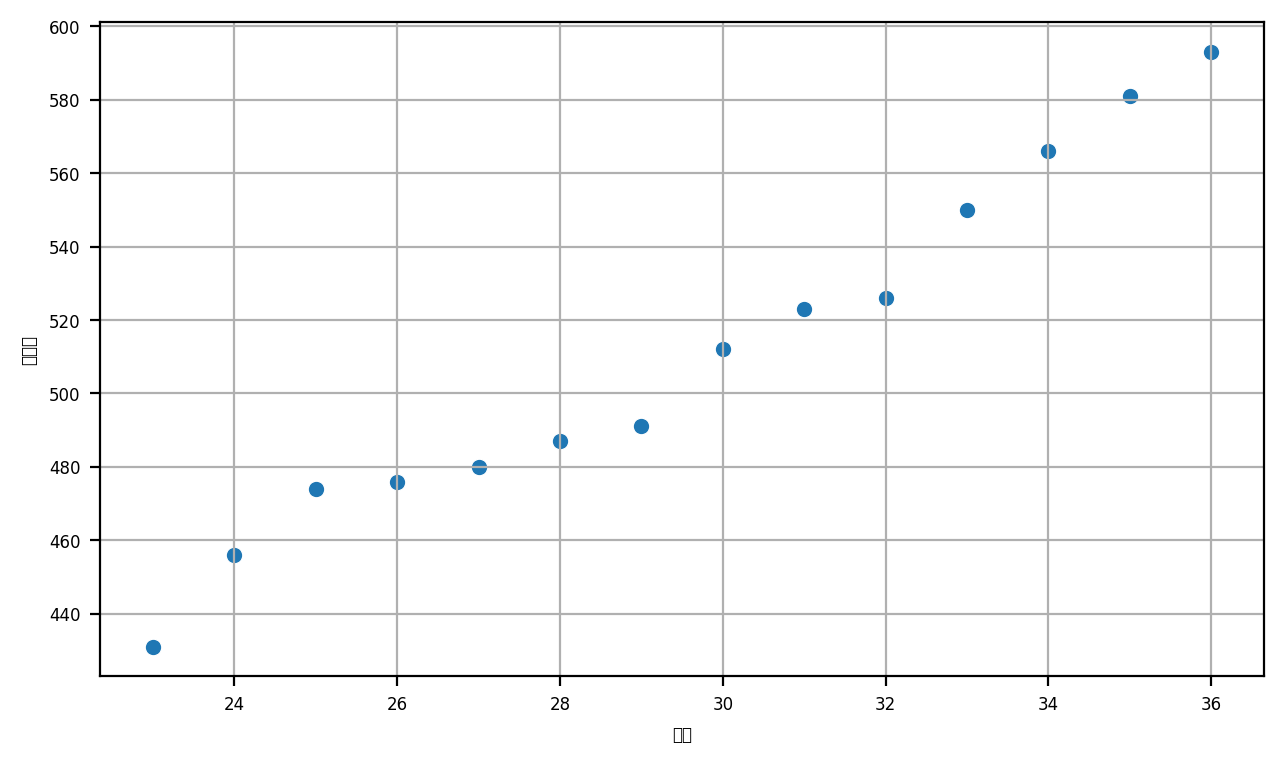

In [20]:
width_px = 1280
height_px = 760
rows = 1
cols=1
figsize = (width_px /my_dpi, height_px/my_dpi)
fig, ax = plt.subplots(rows,cols,figsize=figsize, dpi=my_dpi)

# 그래프 그리기->seaborn 사용
sb.scatterplot(data=origin, x='기온', y = '판매량')
           

ax.grid(True)

plt.tight_layout()
plt.show()
plt.close()

In [21]:
판매량에 미치는 영향 찾기
기울기와 절편 찾기
가중치, 편향

SyntaxError: invalid syntax (3235919622.py, line 1)

# 03.추세선(회귀선)그리기

###1.기울기(계수,가중치)와 절편(상수항,편향) 구하기

In [23]:
z = np.polyfit(origin['기온'], origin['판매량'],1)
print("상수항", z[0])
print("계수", z[1])

상수항 11.397802197802186
계수 174.19340659340722


###2.회귀 분석 모형

In [25]:
expr = "y = %0.1f * x + %0.1f" % (z[0],z[1])
expr

'y = 11.4 * x + 174.2'

###3.분석 모형 객체 생성

In [27]:
f = np.poly1d(z)
f

poly1d([ 11.3978022 , 174.19340659])

###4.분석모형을 활용한 판매량 예

In [29]:
x = 40
print("기온이 %d일 경우 아이스크림 판매량은 %f로 예상됩니다." % (x,f(x)))

기온이 40일 경우 아이스크림 판매량은 630.105495로 예상됩니다.


###5.전체 기온에 대한 예측 판매량 확

In [31]:
x = origin['기온']
y = f(x)
y

array([436.34285714, 584.51428571, 516.12747253, 459.13846154,
       470.53626374, 527.52527473, 504.72967033, 538.92307692,
       550.32087912, 447.74065934, 561.71868132, 573.11648352,
       481.93406593, 493.33186813])

###6.추세선을 포함하는 산점도 그래프

findfont: Font family './NotoSansKR-Regular.ttf' not found.
findfont: Font family './NotoSansKR-Regular.ttf' not found.
findfont: Font family './NotoSansKR-Regular.ttf' not found.
findfont: Font family './NotoSansKR-Regular.ttf' not found.
findfont: Font family './NotoSansKR-Regular.ttf' not found.
findfont: Font family './NotoSansKR-Regular.ttf' not found.
findfont: Font family './NotoSansKR-Regular.ttf' not found.
findfont: Font family './NotoSansKR-Regular.ttf' not found.
findfont: Font family './NotoSansKR-Regular.ttf' not found.
C:\Users\itwill\AppData\Local\Temp\ipykernel_30012\3942233312.py:15: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\itwill\AppData\Local\Temp\ipykernel_30012\3942233312.py:15: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
findfont: Font family './NotoSansKR-Regular.ttf' not found.
findfont: Font family './NotoSansKR-Regular.ttf' not

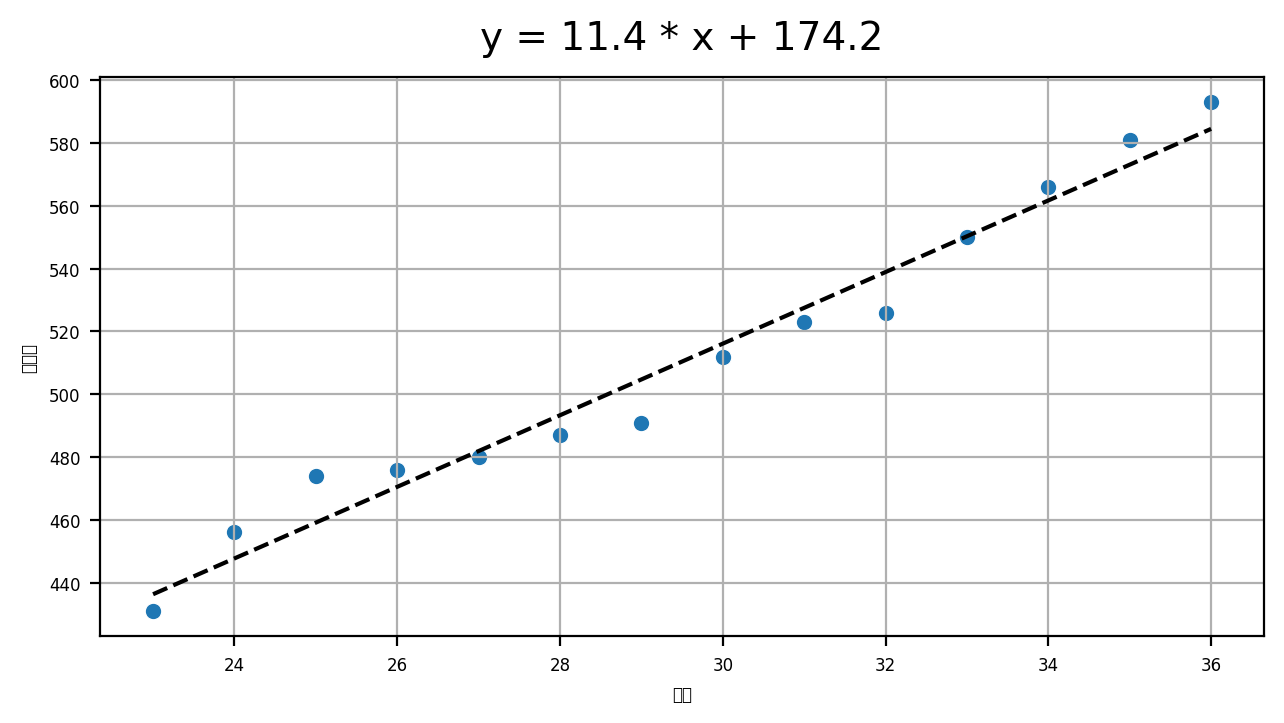

In [32]:
width_px = 1280
height_px = 720
rows = 1
cols=1
figsize = (width_px /my_dpi, height_px/my_dpi)
fig, ax = plt.subplots(rows,cols,figsize=figsize, dpi=my_dpi)

# 그래프 그리기->seaborn 사용
sb.scatterplot(data=origin, x='기온', y='판매량')

sb.lineplot(x=x, y=y,color="#000000", linestyle="--")       

ax.set_title(expr, fontsize = 14, pad=10)
ax.grid(True)
plt.tight_layout()
plt.show()
plt.close()